heart-disease-prediction-with-ensemble-learning.ipynb

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [ ]:
# pip install --upgrade matplotlib

## Loading Dataset

In [ ]:
df = pd.read_csv("../content/Cleveland Dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As can be seen from the table above there is no null value; however some values in the dataset have values like "?" , so we should convert them to "Null".

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


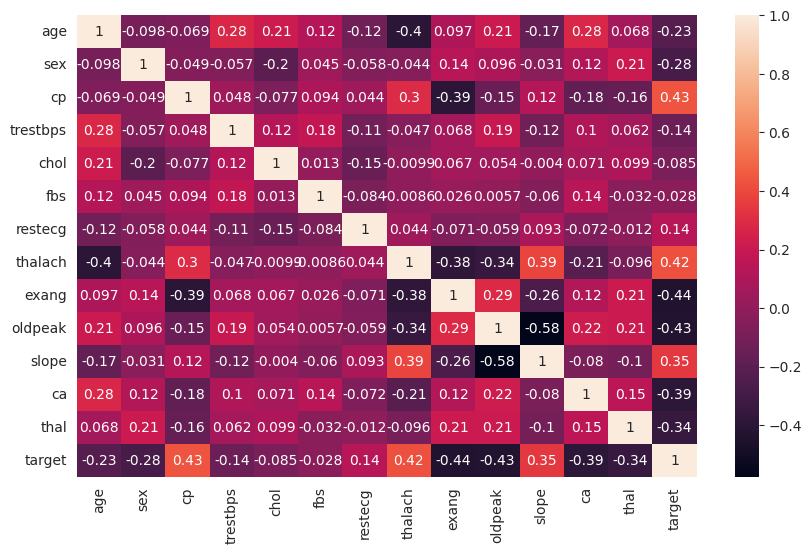

In [ ]:
sns.heatmap(df.corr(), annot=True);

Based on the heatmap above, correlation on cp(chest pain) and num(our main target and also known as "attack") and between oldpeak(st depression) and num have been detected.

In [ ]:
df.duplicated().sum()


1

The target variable's name has been changed in order to get the title of column clearly.

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.rename(columns={'num       ': 'attack'}, inplace=True)

Then question marks have been turned into Null.

In [ ]:
df.replace("?", np.nan, inplace=True)



Since data types of some columns were object, they were changed.

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# df = df.astype({'cp': 'int64',
#                 'trestbps' : 'int64',
#                 'chol': 'int64',
#                 'fbs': 'int64',
#                 'restecg': 'int64',
#                 'oldpeak': 'int64',
#                 'slope' : 'int64'


#                 })

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


### Age

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

I wanted to see distribution of ages who've had a heart attack.
As we can see, there is a density between 45 and 60 years.

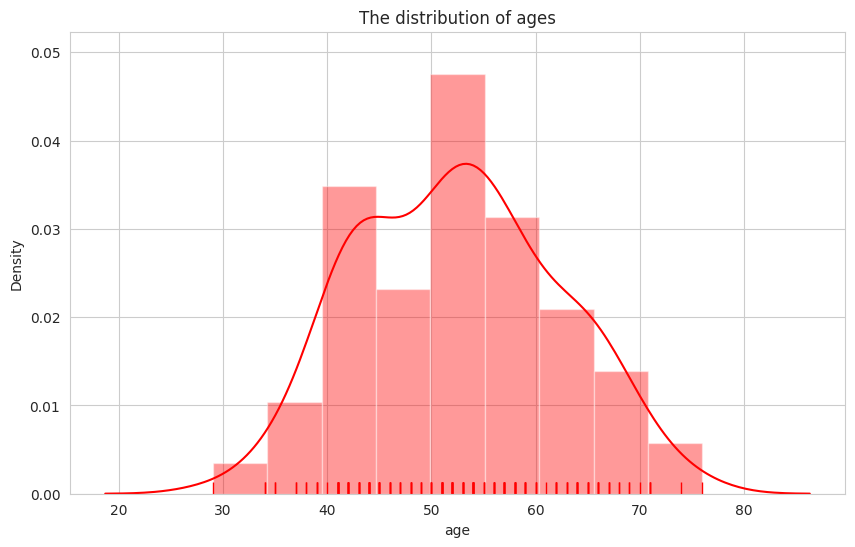

In [ ]:
attack_data = df[df.target==1]
# I got the data of people who've had a heart attack only, to analyze them in detail. I will use this data for next visualizations.

ax= sns.distplot(attack_data.age, rug=True, color="red")
plt.title("The distribution of ages")
plt.show()

**The relation between age and heart attack:** Whereas the blue one represents the people who have had a heart attack, the green one represents the people who haven't had a heart attack.

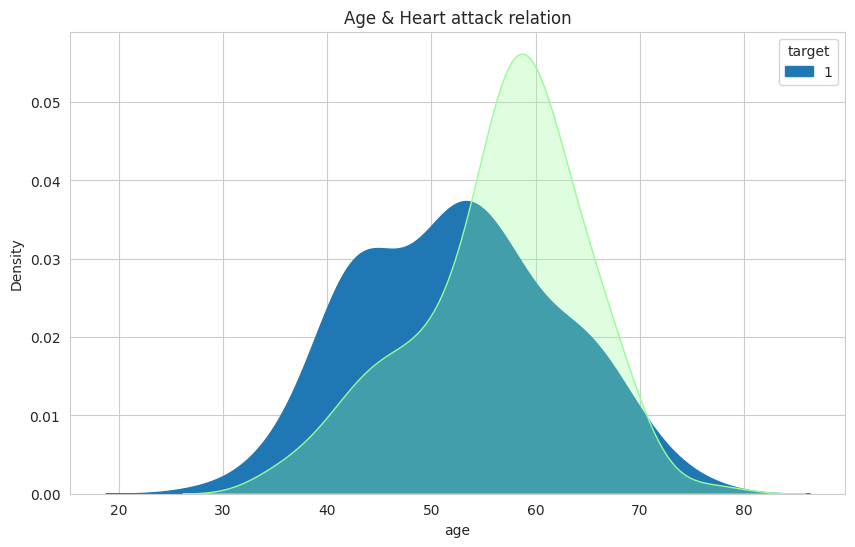

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.title("Age & Heart attack relation")
sns.kdeplot(data=df[df.target==1],x='age',hue = "target", shade=True,ax = ax1 ,color='coral',alpha=1)
sns.kdeplot(data=df[df.target==0],x='age',shade=True,ax = ax1,color='palegreen',alpha=0.3);

### Sex

In [ ]:
df.age.isnull().sum()

0

In [ ]:
ax= sns.countplot(x=df.sex, hue="sex", palette="Set3")
#ax=(data=df[df.target==1],x='sex',hue = "target", shade=True,ax = ax1 ,color='coral',alpha=1)
 #sns.kdeplot(data=df[df.target==0],x='age',shade=True,ax = ax1,color='palegreen',alpha=0.3);
plt.title("The distribution of heart attack according to sex")
for p in ax.containers:
      ax.bar_label(p)

ValueError: ignored

The relation between sex and the probability of having a heart attack

In [ ]:
df.groupby('sex').target.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average heart attack risk percentage according to sex
# 1 --> male, 0 --> female

sex
0   75.000
1   44.928
Name: target, dtype: float64

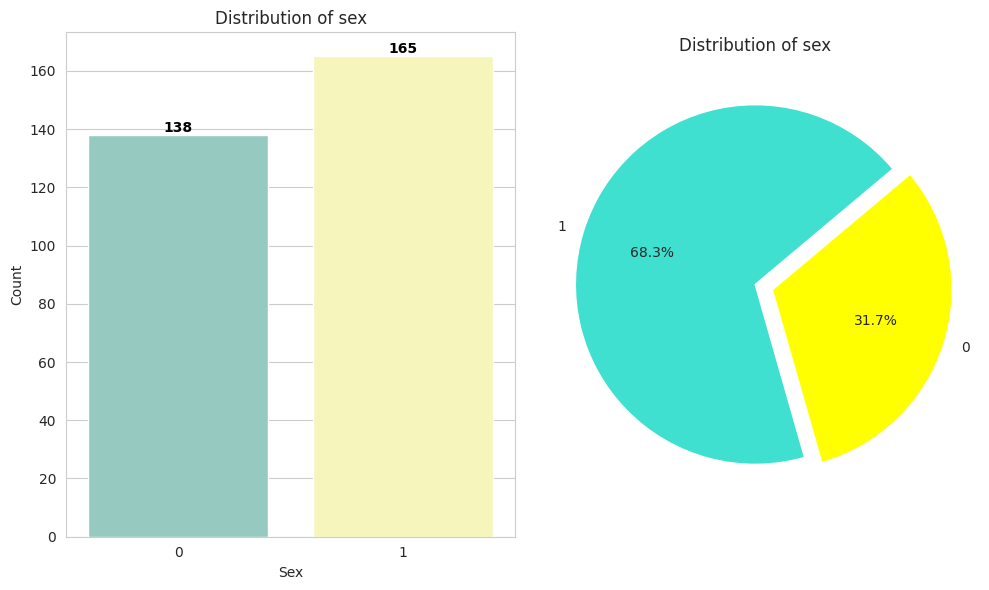

In [ ]:
plt.subplot(1,2,1)
ax = sns.countplot(x='target', data=df, palette="Set3")
plt.title('Distribution of sex')
plt.xlabel('Sex')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=10, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.sex.value_counts(), labels = df.sex.value_counts().index, autopct = '%1.1f%%', startangle = 40, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of sex')
plt.tight_layout()
plt.show()

### Cp

In [ ]:
df.cp.isnull().sum()

0

### Trestbps

In [ ]:
df.trestbps.isnull().sum()

0

In [ ]:
df.trestbps.value_counts(dropna=False)

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

The null values have been filled with the mean.

In [ ]:
trestbps_mean = df["trestbps"].mean()
trestbps_mean

131.62376237623764

In [ ]:
df.trestbps.fillna(trestbps_mean, inplace=True)

### Chol

In [ ]:
df.chol.isnull().sum()

0

In [ ]:
df.chol.value_counts(dropna=False).sort_values()

131    1
394    1
305    1
217    1
174    1
      ..
254    5
269    5
234    6
197    6
204    6
Name: chol, Length: 152, dtype: int64

Again, mean has been used here.

In [ ]:
chol_mean = df["chol"].mean()
chol_mean

246.26402640264027

In [ ]:
df.chol.fillna(chol_mean, inplace=True)

In [ ]:
df.chol.isnull().sum()

0

### fbs

In [ ]:
df.fbs.isnull().sum()

0

In [ ]:
df.fbs.value_counts(dropna=False)

0    258
1     45
Name: fbs, dtype: int64

In [ ]:
df.groupby("target")["fbs"].value_counts(dropna=False)
# to show whether fbs is related with heart attack

target  fbs
0       0      116
        1       22
1       0      142
        1       23
Name: fbs, dtype: int64

Null values have been filled with the mode here.

In [ ]:
df.fbs.fillna(0, inplace=True)

In [ ]:
df.fbs.isnull().sum()

0

### Restecg

In [ ]:
df.restecg.isnull().sum()

0

In [ ]:
df.restecg.value_counts(dropna=False)

1    152
0    147
2      4
Name: restecg, dtype: int64

Mode has been used here again.

In [ ]:
df.restecg.fillna(235, inplace=True)

In [ ]:
df.restecg.isnull().sum()

0

### thalach

In [ ]:
df.thalach.isnull().sum()

0

In [ ]:
df.thalach.value_counts(dropna=False)

162    11
160     9
163     9
152     8
173     8
125     7
144     7
143     7
150     7
132     7
172     7
156     6
169     6
158     6
142     6
140     6
182     5
147     5
165     5
170     5
168     5
154     5
157     5
179     5
161     5
178     5
174     5
146     4
155     4
145     4
122     4
126     4
130     4
159     4
131     4
171     4
151     4
105     3
114     3
175     3
120     3
111     3
153     3
148     3
138     3
115     3
166     3
141     3
103     2
136     2
112     2
96      2
181     2
116     2
109     2
133     2
108     2
123     2
180     2
164     2
139     2
149     2
186     2
88      1
97      1
127     1
137     1
124     1
194     1
188     1
106     1
95      1
117     1
71      1
118     1
134     1
195     1
99      1
177     1
167     1
113     1
128     1
129     1
185     1
190     1
187     1
202     1
184     1
121     1
192     1
90      1
Name: thalach, dtype: int64

In [ ]:
thalach_median = df.thalach.median()
thalach_median

153.0

Median has been used here.

In [ ]:
df.thalach.fillna(thalach_median, inplace=True)

### exang

In [ ]:
df.exang.isnull().sum()

0

In [ ]:
df.exang.value_counts(dropna=False)

0    204
1     99
Name: exang, dtype: int64

In [ ]:
df.groupby("target")["exang"].value_counts(dropna=False)
# to show whether there is a relation between "exang" feature and heart attack.

target  exang
0       1         76
        0         62
1       0        142
        1         23
Name: exang, dtype: int64

Mode has been used.

In [ ]:
df.exang.fillna(0, inplace=True)

### oldpeak

In [ ]:
df.oldpeak.isnull().sum()

0

### slope

Since there are a lot of null values, this column will be dropped.

In [ ]:
df.slope.isnull().sum()  # drop

0

 ### ca

Also this column will be dropped.

In [ ]:
df.ca.isnull().sum() # drop

0

### thal

And this column.

In [ ]:
df.thal.isnull().sum() # drop

0

In [ ]:
df.drop(columns= ["slope","ca","thal"], inplace=True)

### Attack (target)

In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

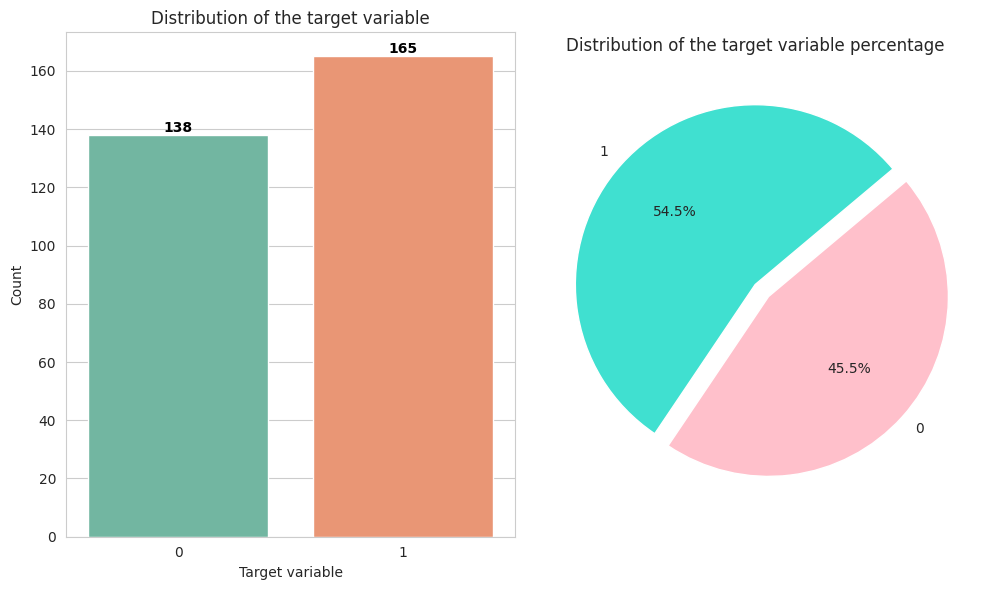

In [ ]:
plt.subplot(1,2,1)
ax = sns.countplot(x='target', data=df, palette="Set2")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=10, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.target.value_counts(), labels = df.target.value_counts().index, autopct = '%1.1f%%', startangle = 40, explode = (0, 0.1), colors = ['turquoise', 'pink'] )
plt.title('Distribution of the target variable percentage')
plt.tight_layout()
plt.show()

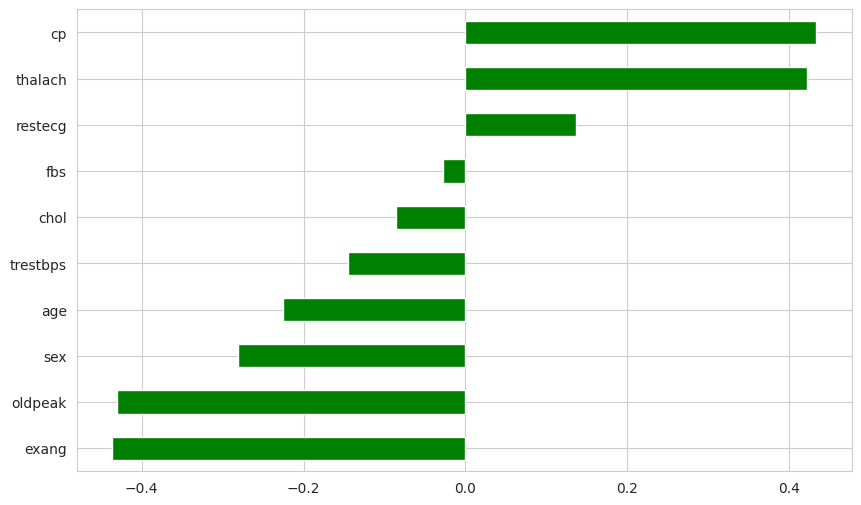

In [ ]:
df.corr()['target'].sort_values().drop('target').plot(kind = 'barh', color="green");
# Correlation of the target column with other columns

## Final Data

In [ ]:
df.isnull().sum()
# At the end of the EDA stage, it has been checked if there were any null values left.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,1,0,150,0,2.300,1
1,37,1,2,130,250,0,1,187,0,3.500,1
2,41,0,1,130,204,0,0,172,0,1.400,1
3,56,1,1,120,236,0,1,178,0,0.800,1
4,57,0,0,120,354,0,1,163,1,0.600,1


The last version of the dataset was displayed and gotten its copy.

In [ ]:
df2 = df.copy()

# Modelling

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print("confussion matrix")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("confussion matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.classifier import PrecisionRecallCurve

ImportError: ignored

Our first model will be Logistic regression.

## Logistic Regression

### Preprocessing

Since the data have ordinal values, "get dummies" has been applied.



In [ ]:
log_df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
columns = ["age", "sex", "chest pain type", "cholesterol", "oldpeak"]
#log_df[columns] = scaler.fit_transform(log_df[columns])

In [ ]:
log_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,63,145,233,150,2.300,1,0,1,0,0,0,1,0,1,1,0,0,1,0
1,37,130,250,187,3.500,1,0,1,0,0,1,0,1,0,0,1,0,1,0
2,41,130,204,172,1.400,1,1,0,0,1,0,0,1,0,1,0,0,1,0
3,56,120,236,178,0.800,1,0,1,0,1,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.600,1,1,0,1,0,0,0,1,0,0,1,0,0,1


Above is the final version of the data we'll be using throughout the Logistic Regression modeling.

In [ ]:
X= log_df.drop(["target"], axis=1)
y= log_df["target"]

At first, "stratify=y" parameter was not used but after using it, the scores have increased as the proportions of values reflected in this parameter and of sample turns into the same by splitting.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

Following the result of first scores, it's time to tune the parameters and use grid search.

In [ ]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[24  4]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
confussion matrix
[[ 82  28]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.79       110
           1       0.81      0.89      0.84       132

    accuracy                           0.82       242
   macro avg       0.83      0.82      0.82       242
weighted avg       0.82      0.82      0.82       242



In [ ]:
log_model=LogisticRegression( C=0.2, max_iter = 200, class_weight="balanced")
log_model.fit(X_train, y_train)
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[24  4]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
confussion matrix
[[ 84  26]
 [ 19 113]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       110
           1       0.81      0.86      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



This model has been tuned several times, and these parameters are the best in terms of scores for the Logistic Regression model.

In [ ]:
y_pred = log_model.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

### Grid Search for Logistic Regression (Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
max_iter = [100, 150, 200, 250, 300, 350, 400]
param_grid = {"penalty" : penalty,
             "C" : C,
              "max_iter" : max_iter}

In [ ]:
log_grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5)

In [ ]:
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.2, class_weight='balanced',
                                          max_iter=200),
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'max_iter': [100, 150, 200, 250, 300, 350, 400],
                         'penalty': ['l1', 'l2']})

In [ ]:
log_grid_model.best_params_

{'C': 100000.0, 'max_iter': 350, 'penalty': 'l2'}

In [ ]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)


Test_Set
confussion matrix
[[23  5]
 [ 9 24]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.83      0.73      0.77        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61


Train_Set
confussion matrix
[[ 83  27]
 [ 18 114]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       110
           1       0.81      0.86      0.84       132

    accuracy                           0.81       242
   macro avg       0.82      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



This has been the best score since being used Logistic Regression. Now its precision-recall curve & Roc Curve will be displayed.

In [ ]:
#plot_precision_recall_curve(log_grid_model, X_test, y_test);  # Precision - Recall Curve

NameError: ignored

In [ ]:
#plot_roc_curve(log_grid_model, X_test, y_test);  # Roc curve

NameError: ignored

In [ ]:
y_pred = log_grid_model.predict(X_test)
log_rec_neg = recall_score(y_test, y_pred, average = None)
log_f1_neg = f1_score(y_test, y_pred, average = None)

## Random Forest

The other model that will be used is Random Forest that represents bagging method. This method has been more resistant to overfitting than Decision Tree. While some decisions have been combined by a decision tree,several decision trees have been combined by a random forest. Thus, decision tree works well on large datasets rapidly. But since our dataset is not too large we used Random Forest here rather than Decision tree.

### Preprocessing

Since tree-based models like Random Forest doesn't need scaling and get dummies, the original data has been used here.

In [ ]:
X= df.drop(["target"], axis=1)
y= df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)
# before tuning
# As we see, there is overfitting. Now I will try to decrease it by tuning the hyperparameters.

Test_Set
confussion matrix
[[24  4]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
confussion matrix
[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced",max_depth=2, random_state=10)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)
# After tuning many times manually, for the random forest model, these parameters gave the best scores. Now I will display its precision-recall curve and Roc Curve.

Test_Set
confussion matrix
[[23  5]
 [10 23]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.82      0.70      0.75        33

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61


Train_Set
confussion matrix
[[ 80  30]
 [ 20 112]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       110
           1       0.79      0.85      0.82       132

    accuracy                           0.79       242
   macro avg       0.79      0.79      0.79       242
weighted avg       0.79      0.79      0.79       242



In [ ]:
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

In [ ]:
#plot_precision_recall_curve(rf_model, X_test, y_test);  # Precision - Recall Curve

NameError: ignored

In [ ]:
#plot_roc_curve(rf_model, X_test, y_test);

NameError: ignored

### Grid Search for Random Forest (Hyperparameter Tuning)

Now I will apply grid search to the Random Forest model.

In [ ]:
param_grid = {'n_estimators':[50, 64, 100, 128, 200, 300],
              'criterion': [ "gini", "entropy"],
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[2,3, 5, 7],
             'min_samples_split':[2, 5, 8]}

In [ ]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "f1").fit(X_train, y_train)

In [ ]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 128}

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[24  4]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
confussion matrix
[[103   7]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       110
           1       0.95      0.99      0.97       132

    accuracy                           0.97       242
   macro avg       0.97      0.96      0.97       242
weighted avg       0.97      0.97      0.97       242



## GradientBoosting

Our third model will be Gradient Boosting. Since Gradient boosting is a boosting model and focuses on the differences of the prediction and ground truth, this model has been chosen for comparison.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier(random_state=10)
grad_model.fit(X_train, y_train)
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[22  6]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
confussion matrix
[[108   2]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.98      0.99      0.99       132

    accuracy                           0.99       242
   macro avg       0.99      0.99      0.99       242
weighted avg       0.99      0.99      0.99       242



### Grid Search for Gradient Boosting (Hyperparamater Tuning)

In [ ]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1],
              'max_depth':[3,4,5,6]}

In [ ]:
gb_model = GradientBoostingClassifier(random_state=10)

In [ ]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1").fit(X_train, y_train)

In [ ]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [ ]:
eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[24  4]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
confussion matrix
[[ 83  27]
 [  7 125]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       110
           1       0.82      0.95      0.88       132

    accuracy                           0.86       242
   macro avg       0.87      0.85      0.86       242
weighted avg       0.87      0.86      0.86       242



In [ ]:
gb_model = GradientBoostingClassifier(random_state=10, learning_rate= 0.02, max_depth= 2, max_features= 6,
                                      n_estimators= 200, subsample= 0.2)
gb_model.fit(X_train, y_train)
eval_metric(gb_model, X_train, y_train, X_test, y_test)
# After Grid search, I tuned the model manually and got better scores.

Test_Set
confussion matrix
[[24  4]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
confussion matrix
[[ 87  23]
 [ 14 118]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       110
           1       0.84      0.89      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242



In [ ]:
#plot_precision_recall_curve(gb_model, X_test, y_test);

NameError: ignored

In [ ]:
#plot_roc_curve(gb_model, X_test, y_test);  # Roc curve

In [ ]:
y_pred = gb_model.predict(X_test)
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

## XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=10).fit(X_train, y_train)
eval_metric(xgb, X_train, y_train, X_test, y_test)
# before tuning

Test_Set
confussion matrix
[[20  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set
confussion matrix
[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



There is overfitting for the model. I will tune it.

In [ ]:
xgb = XGBClassifier(random_state=10, max_depth=2, learning_rate=0.1, scale_pos_weight=3, subsample=0.1).fit(X_train, y_train)
eval_metric(xgb, X_train, y_train, X_test, y_test)
# after tuning

Test_Set
confussion matrix
[[16 12]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.76      0.57      0.65        28
           1       0.70      0.85      0.77        33

    accuracy                           0.72        61
   macro avg       0.73      0.71      0.71        61
weighted avg       0.73      0.72      0.71        61


Train_Set
confussion matrix
[[ 76  34]
 [  8 124]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       110
           1       0.78      0.94      0.86       132

    accuracy                           0.83       242
   macro avg       0.84      0.82      0.82       242
weighted avg       0.84      0.83      0.82       242



### Grid Search for XG Boost ( Hyperparameter Tuning)


In [ ]:
param_grid = {"n_estimators":[50, 100, 200, 250],
              'max_depth':[4,6,8],
              "learning_rate": [0.1, 0.2],
              "subsample":[0.5, 1, 1.5],
              "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=10)

In [ ]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1").fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 0.5}

In [ ]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[21  7]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set
confussion matrix
[[108   2]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       132

    accuracy                           0.99       242
   macro avg       0.99      0.99      0.99       242
weighted avg       0.99      0.99      0.99       242



In [ ]:
#plot_precision_recall_curve(xgb_grid, X_test, y_test);

NameError: ignored

In [ ]:
#plot_roc_curve(xgb_grid, X_test, y_test);  # Roc curve

For XG boost, the model manually tuned gave better scores than the grid search model. Therefore, we saved its' scores.

In [ ]:
y_pred = xgb.predict(X_test)
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

# Comparing Different Models

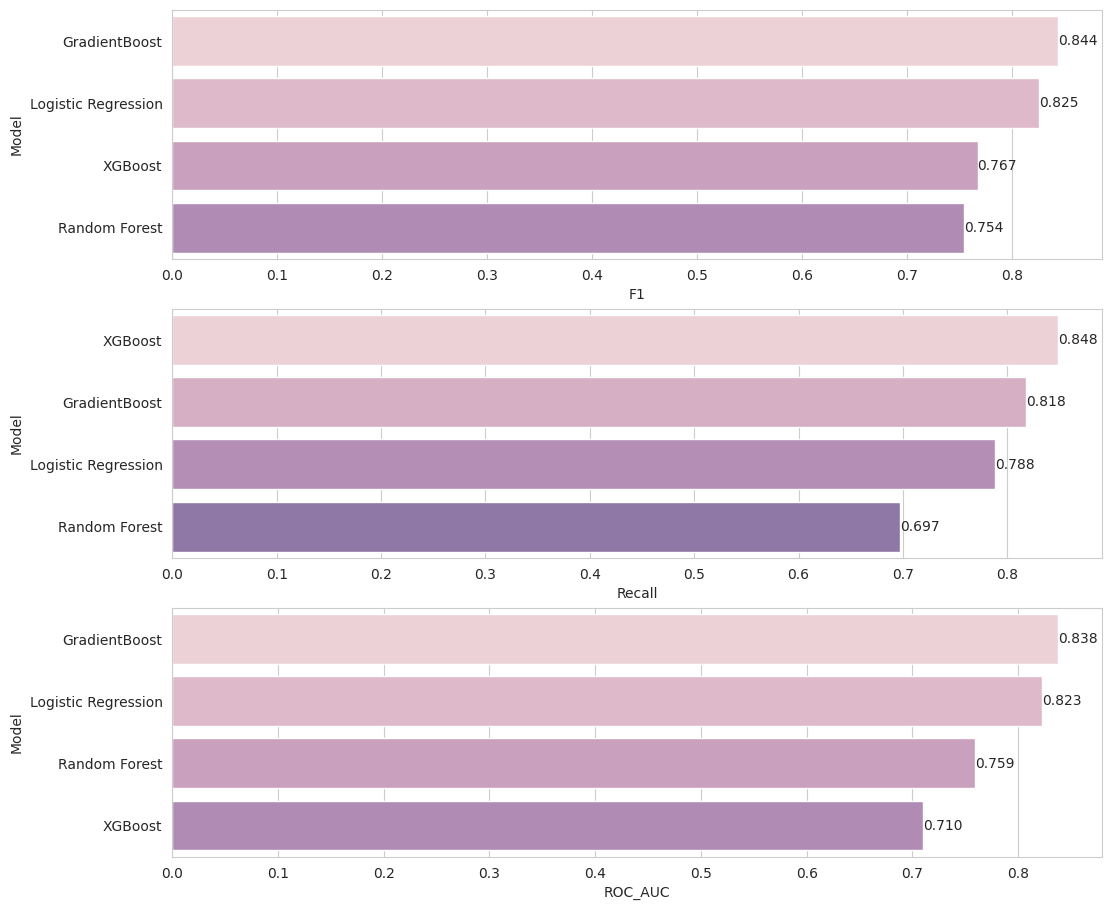

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "GradientBoost", "XGBoost"],

                        "F1": [log_f1, rf_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, rf_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, rf_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2,
                '{:1.3f}'.format(width),
                ha = 'left',
                va = 'center')

plt.figure(figsize=(12,11))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="ch:8.3,.6,dark=.6")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="ch:8.3,.6,dark=.5")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="ch:8.3,.6,dark=.6")
labels(ax)
plt.show()

## Final Model

The final model has been created with its best parameters using Pipeline.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model_pipeline = Pipeline([('classifier', LogisticRegression(C=0.2, max_iter = 200, class_weight="balanced"))])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.2, class_weight='balanced',
                                    max_iter=200))])